# **Retrieving Similar Documents Based On A Query Document**

The idea is to convert each document into vectors by using inbuilt vectorizer methods and then calculating similarity between the query document and the documents we have, then retrieve the top 5 similar documents , i.e; the documents which talk about similar things as the query document

The modules we make use of here are:
1. pandas to handle the csv files and dataframes
obtained 
2. re and string module which contains methods we use to remove noisy data, which in real life tends to be huge
3. numpy module to perform mathematical operations on the vectors or matrices we work with
4. nltk module which provides many modules for nlp, from which we used LancasterStemmer
5. matplotlib and wordcloud to visualize data
6. sklearn to calculate cosine similarity

In [0]:
import pandas as pd 
dataset = pd.read_csv('dataset_1.csv')  
pd.set_option("display.max_colwidth",200) #To extend the display of outputs obtained by invoking pandas
dataset.head() #Displays the first 5 rows of our dataframe

,id,text
0,0,"<p>What does ""backprop"" mean? I've Googled it, but it's showing backpropagation.</p>\n\n<p>Is the ""backprop"" term basically the same as ""backpropagation"" or does it have a different meaning?</p>\n"
1,1,<p>Does increasing the noise in data help to improve the learning ability of a network? Does it make any difference or does it depend on the problem being solved? How is it affect the generalizati...
2,2,"<p>When you're writing your algorithm, how do you know how many neurons you need per single layer? Are there any methods for finding the optimal number of them, or is it a rule of thumb?</p>\n"
3,3,<p>I have a LEGO Mindstorms EV3 and I'm wondering if there's any way I could start coding the bot in Python rather than the default drag-and-drop system. Is a Mindstorm considered AI?</p>\n\n<p>Is...
4,4,<p>The intelligent agent definition of intelligence states that an agent is intelligent if it acts so to maximize the expected value of a performance measure based on past experience and knowledge...


**Cleaning Data**
1. StopWords
The frequently used words in english language which do not add much meaning to the sentence, are called StopWords.All documents contain these in huge number and we remove them.
2. Removing Punctuations 
3. Stemming:
  By stemming we cut down the prefixes and suffixes of words so that, different versions of the same word can be removed
4. Removing html tags and other noisy data

In [0]:
import re
import string
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from nltk.stem import LancasterStemmer

def clean(sent):
  lcs = LancasterStemmer()            #Using LancasterStemmer
  sent = sent.lower()                 #Converting the text to lower case
  sent = re.sub(r'<[^<]+>',' ',sent)  #Removing html tags
  sent = re.sub(r'\n',' ',sent)       #Removing \n characters
  s = string.punctuation
  s = s.replace("'","")                 #i've
  table = str.maketrans({pun : None for pun in s}) #Removing punctuations in the text
  sent = sent.translate(table)
  temp=''
  for word in sent.split():
    if word not in STOPWORDS and len(word)>1:   #Removing stopwords and words whose length is 1
      temp+=" "+lcs.stem(word)
  sent=temp
  sent=re.sub(r"['\d]",'',sent)         #Removing the numbers in our data
  
  return sent

In [0]:
#Generates a list of words for the given string
def gen_word(string):
  word_list = []
  for word in string.split():
    word_list.extend(word)
  return word_list

#Generates frequency of all the unique words in all our docs
def gen_freq(word_list):
    word_freq = pd.Series(word_list).value_counts()   #Returns freq of each words
    return word_freq


In [0]:
#Applying the clean function to our data
cleaned_data=dataset.text.apply(lambda x:clean(x))
word_list=gen_word(cleaned_data.str)
freq=gen_freq(word_list)



**Visualizing the words we have**

Here, we are making use of WordCloud, which displays the words based on their frequency beautifully.The words which are bigger have most frequency and the words which are smaller have occurred the least number of times

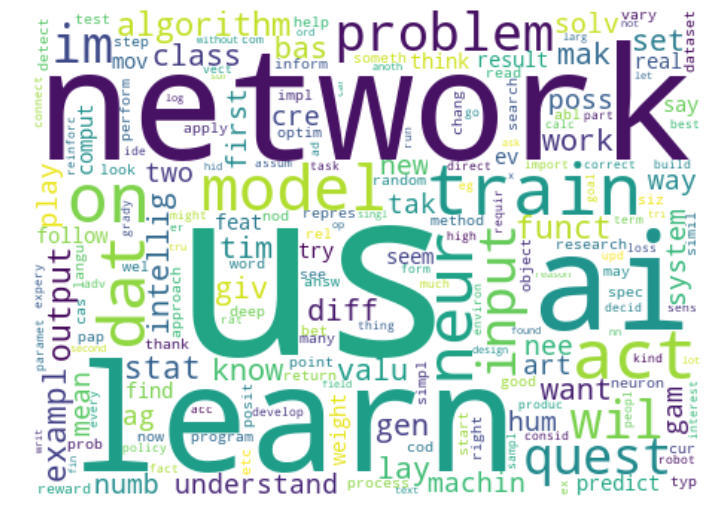

In [0]:
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(freq)
plt.figure(figsize=(12, 14))             #The size of area in which the plot appears
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')                          #Dropping the axis of the plot
plt.show()

**Vectorization**

Every model we built will finally, have to work on numbers. There are many ways in which we can convert our words to vectors. Some of the popular ones are BagOfWords, TfidfVectorizer, Word2Vec.
     
     We chose TfidfVectorizer, because the simple BagOfWords model just calculates the frequency of words in that document and creates a vector. But the TfidfVectorizer calculates TF*IDF scores for the words and transforms them into vectors. These scores tell us how rare a word is or how important that word is in our corpus.
     



In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1500)
#max_df signifies that the max frequency of the term considered is 0.90 and the minimum frequency is 2
#The maximum features considered are 1500 i.e; the number of columns will be 1500 
tfidf = tfidf_vectorizer.fit_transform(cleaned_data) 
tfidf.shape

(3126, 1500)

In [0]:
queryset = pd.read_csv('q_d.csv') #Loading our query dataset
print(queryset.head())  
cleaned_query = queryset.text.apply(lambda x:clean(x))  #Cleaning query data


   id                                                                                                                                                                                                     text
0   1             <p>Obviously this is hypothetical, but is true? I know "perfect fitness function" is a bit hand-wavy, but I mean it as we have a perfect way to measure the completion of any problem.</p>\n
1   2  <p>I'm curious about Artificial Intelligence. In my everyday job I develop standard applications, like websites with basic functionalities like user subscription, file upload, forms saved in a dat...
2   3  <p>I've heard of AI that can solve math problems. Is it possible to create a 'logic system' equivalent to humans that can solve mathematics in the so called 'beautiful' manner?  Can AI find beauty...
3   4                                                                             <p>I'm trying to gain some intuition beyond definitions, in any possible dimension. I'd ap

In [0]:
tfidf2 = tfidf_vectorizer.transform(cleaned_query) 
#Note: Use transform while introducing new data, not fit_transform
for x in tfidf2[0]:
  print(x)

  (0, 1448)	0.1629124331932145
  (0, 1394)	0.23625262544997322
  (0, 1029)	0.15068875127974146
  (0, 966)	0.5980917337135757
  (0, 910)	0.2536676209940112
  (0, 819)	0.2654710333155369
  (0, 817)	0.17294697645959717
  (0, 727)	0.150144563797423
  (0, 644)	0.36186240397776953
  (0, 551)	0.16747018078282064
  (0, 523)	0.25474594138097967
  (0, 255)	0.2515691006627643
  (0, 151)	0.2505475369727925


**Calculating Similarity**

Here, we have to notice that the vectors we are working with are 1500 columns long in which many entries will be empty. Initially, we tried with scipy module to calculate cosine angle but it doesnt work with sparse arrays. So we shifted to *sklearn* library

In [0]:
#Uncomment this to find out what happens when we use cosine distance of scipy module.
#Note: This does not work for sparse vectors, which is usually the case for large documents.
# import scipy
# my_list=[]
# print(tfidf[0].shape)
# for i in range(tfidf.shape[0]):
#   angle = scipy.spatial.distance.cosine(tfidf[i],tfidf2[0])
    #doesnt work unless we convert them to dense vectors by calling .todense() method
#   my_list.append([i,angle])
# my_list

In [0]:
import sklearn
print(tfidf[0].shape)
#This method calculates the cosine angle between query vector j, and every other vector in our dataframe
def cos(index):
  my_list={}
  for i in range(tfidf.shape[0]):  
    cos_ang = sklearn.metrics.pairwise.cosine_similarity(tfidf[i],tfidf2[index])  #Cosine Similarity
    my_list[i] = cos_ang[0][0]  #Storing the index and angle of the document to retrieve it later
  return my_list

(1, 1500)


**Retrieving top 5 documents which match the query**

After storing the index and angles, we are sorting them in descending order based on angle, i.e; the higher angles at the top. Higher the cosine angle, closer the document to query.   

In [0]:

for i in range(tfidf2.shape[0]):
  angles=cos(i)
  sorted_angles = sorted(angles.items(), key=lambda k:k[1],reverse=True) #Sorting based on value that is,angle
  print("Query "+str(i+1)+": "+queryset['text'][i])
  for j in range(1,5):
    print(str(j)+" "+dataset['text'][sorted_angles[j][0]]) #Printing documents 
  print("Query Completed: "+str(i+1)) 



Query 1: <p>Obviously this is hypothetical, but is true? I know "perfect fitness function" is a bit hand-wavy, but I mean it as we have a perfect way to measure the completion of any problem.</p>

1 <p>Would AlphaGo Zero become theoretically perfect with enough training time? If not, what would be the limiting factor?</p>

<p>(By perfect, I mean it always wins the game if possible, even against another perfect opponent.)</p>

2 <p>In genetic algorithms, a function called "fitness" (or "evaluation") function is used to determine the "fitness" of the chromosomes. Creating a good fitness function is one of the challenging tasks in genetic algorithms. How would you create a good fitness function?</p>

3 <p>O'Reilly recently published an article about the machine learning paradox. (<a href="https://www.oreilly.com/ideas/the-machine-learning-paradox" rel="nofollow noreferrer">link</a>)</p>

<p>What it says goes basically like this: no machine learning algorithm can be perfect. If it was, it 